In [1]:
from tools import *
housing = load_housing_data()

In [2]:
import numpy as np

X = np.array([
[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 1, 0, 1],
[1, 0, 1, 0],
])
y = np.array([0, 1, 0, 1])

print(X[:, ::2])

counts = {}

for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("{}".format(counts))



[[0 0]
 [1 1]
 [0 0]
 [1 1]]
{0: array([0, 2, 0, 2]), 1: array([2, 0, 2, 1])}


In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F196780>,
      dtype=object)

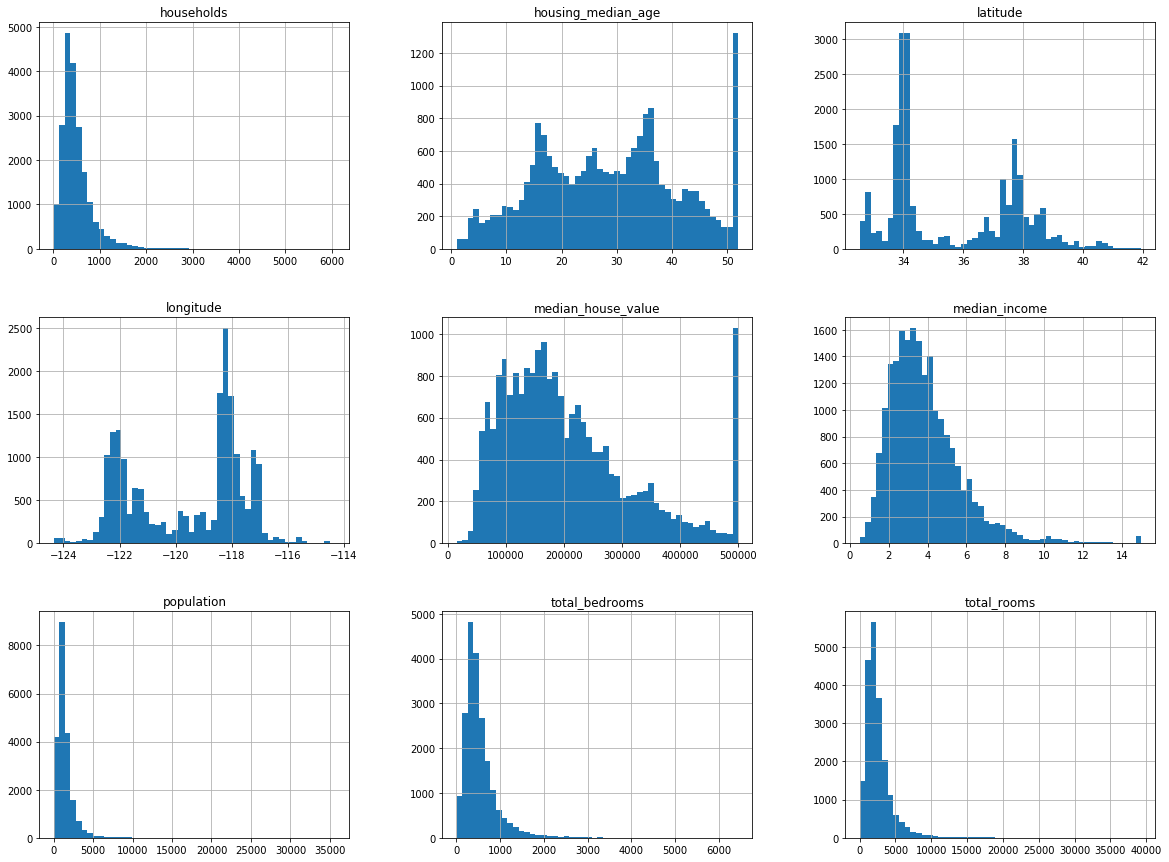

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=.2, random_state=42)

0        5.550133
1        5.534267
2        4.838267
3        3.762067
4        2.564133
5        2.691200
6        2.439400
7        2.080000
8        1.386933
9        2.460800
10       2.135400
11       2.180333
12       2.050000
13       1.782400
14       1.277800
15       1.416667
16       1.850000
17       1.413467
18       1.327400
19       1.735533
20       0.905200
21       1.142333
22       1.150000
23       1.453733
24       1.733333
25       1.602533
26       1.639800
27       1.205333
28       1.094933
29       1.125000
           ...   
20610    0.908733
20611    0.857133
20612    0.995600
20613    0.997200
20614    1.646333
20615    1.573200
20616    1.364600
20617    2.201400
20618    1.500000
20619    1.820200
20620    3.041667
20621    1.577400
20622    1.611133
20623    1.882333
20624    2.049267
20625    2.750000
20626    1.444467
20627    2.000000
20628    1.730133
20629    1.396200
20630    2.378200
20631    2.345267
20632    2.083333
20633    1.699667
20634    2

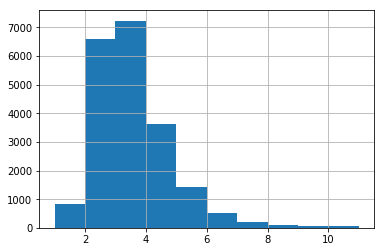

In [9]:
import numpy as np
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
print(housing['median_income'] / 1.5)
housing['income_cat'].hist()

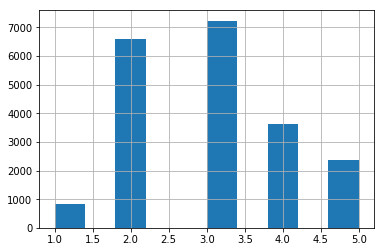

In [10]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
housing['income_cat'].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
housing['income_cat'].value_counts() / len(housing)


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [13]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [14]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [15]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [16]:
housing = strat_train_set.copy()

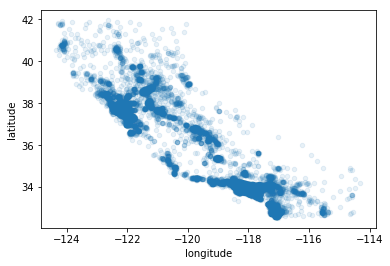

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)

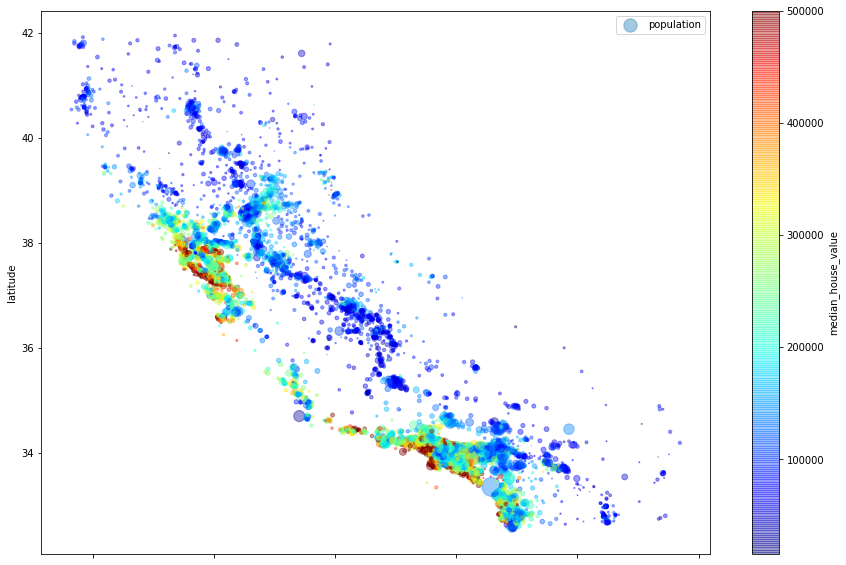

In [18]:
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=.4,
    s=housing['population']/100,
    label='population',
    figsize=(15,10),
    c='median_house_value',
    cmap=plt.get_cmap('jet'),
    colorbar=True
)

In [19]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001465C470>,
      dtype=object)

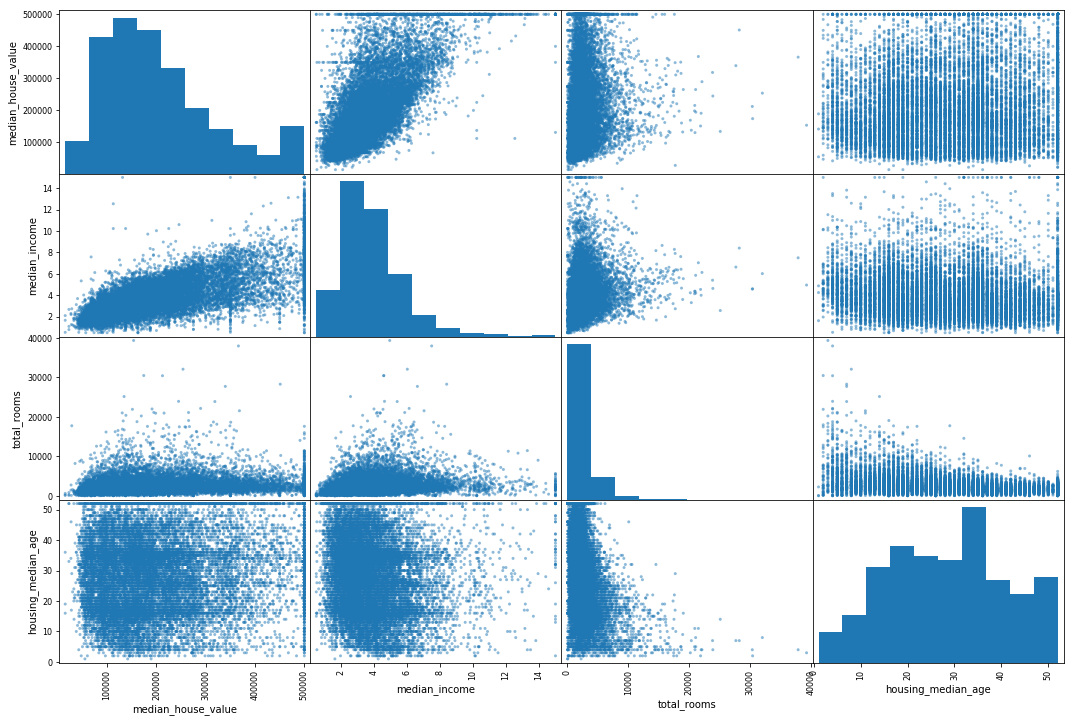

In [20]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(18,12))

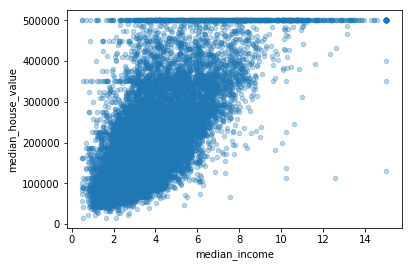

In [21]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=.3)

In [22]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [23]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [24]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [25]:
mediana = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(mediana, inplace=True)

In [26]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [27]:
# from future_encoders import OrdinalEncoder

# ordinal_encoder = OrdinalEncoder()
# housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# ordinal_encoder.categories_

In [28]:
from future_encoders import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat = housing[['ocean_proximity']]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

print(housing_cat_1hot)
print(cat_encoder.categories_)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [30]:
from transformer import CombinedAttributesAdder


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
print(housing_extra_attribs)

[[-121.89 37.29 38.0 ... '<1H OCEAN' 4.625368731563422 2.094395280235988]
 [-121.93 37.05 14.0 ... '<1H OCEAN' 6.008849557522124 2.7079646017699117]
 [-117.2 32.77 31.0 ... 'NEAR OCEAN' 4.225108225108225 2.0259740259740258]
 ...
 [-116.4 34.09 9.0 ... 'INLAND' 6.34640522875817 2.742483660130719]
 [-118.01 33.82 31.0 ... '<1H OCEAN' 5.50561797752809 3.808988764044944]
 [-122.45 37.77 52.0 ... 'NEAR BAY' 4.843505477308295 1.9859154929577465]]


In [31]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [33]:
from transformer import DataFrameSelector

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

In [34]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

housing_prepared = full_pipeline.fit_transform(housing)

cat_pipeline.named_steps['cat_encoder'].categories_
add_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
ocean_proximity_attribs = list(cat_pipeline.named_steps['cat_encoder'].categories_[0])

pd.DataFrame(housing_prepared, columns=num_attribs + add_attribs + ocean_proximity_attribs).head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
5,-0.696456,0.945009,-0.370047,0.143693,0.131447,0.025285,0.194138,-0.176435,-0.114867,-0.048003,-0.199264,0.0,1.0,0.0,0.0,0.0
6,0.537433,-0.748168,1.856709,-0.182253,-0.528198,-0.583328,-0.585720,2.366702,1.003599,-0.027646,-1.097923,1.0,0.0,0.0,0.0,0.0
7,1.166867,-0.696718,-0.210993,-0.272040,-0.586617,-0.433639,-0.324880,1.115239,0.000891,-0.051831,-1.073504,0.0,1.0,0.0,0.0,0.0
8,0.657325,-0.771554,1.459074,-0.354345,-0.167949,0.444770,-0.157197,-1.076906,-0.452724,0.110319,0.545225,1.0,0.0,0.0,0.0,0.0
9,0.647334,-0.757522,0.027588,-0.985660,-0.742400,1.138535,-0.745417,-1.772116,-1.174387,0.802788,3.534531,1.0,0.0,0.0,0.0,0.0


In [35]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
print(lin_reg.coef_, lin_reg.intercept_)

[-55650.4116403  -56716.45236929  13732.83841856  -1933.1277138
   7330.04062103 -45708.26306673  45455.47519691  74714.39134154
   6605.12802802   1042.95709453   9249.75886697 -18016.52432168
 -55219.15208555 110357.78363967 -22479.84008184 -14642.2671506 ] 236914.99732815972


In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
from sklearn.svm import SVR

# svr_reg = SVR()
# svr_reg.fit(housing_prepared, housing_labels)

In [40]:
from sklearn.model_selection import cross_val_score

def rmse_calcutale(model, data, labels, scoring="neg_mean_squared_error", cv=10):
    scores = cross_val_score(model, data, labels, scoring=scoring, cv=cv)
    return np.sqrt(-scores)  

In [41]:
tree_rmse_scores = rmse_calcutale(tree_reg, housing_prepared, housing_labels)
lin_rmse_scores = rmse_calcutale(lin_reg, housing_prepared, housing_labels)
forest_rmse_scores = rmse_calcutale(forest_reg, housing_prepared, housing_labels)

In [42]:
def display_scores(scores):
    print("Суммы оценок: ", scores)
    print("Среднее: ", scores.mean())
    print("Стандартное отклонение: ", scores.std())

In [43]:
print("Linear")
display_scores(lin_rmse_scores)
print("")
print("Tree")
display_scores(tree_rmse_scores)
print("")
print("Forest")
display_scores(forest_rmse_scores)



Linear
Суммы оценок:  [66756.89288533 66963.71866078 70347.95244419 74752.93602822
 68031.13388938 71204.4762852  64967.81468897 68273.02578122
 71552.91566558 67661.80150892]
Среднее:  69051.2667837788
Стандартное отклонение:  2737.855325840758

Tree
Суммы оценок:  [68764.2521792  65363.057902   68788.64359222 69788.16697483
 70234.12000762 74617.01283327 69941.57343475 70082.00219671
 76642.18713989 70010.13515997]
Среднее:  70423.11514204646
Стандартное отклонение:  2970.703762864062

Forest
Суммы оценок:  [51565.99510769 49507.94908399 52754.52077824 54634.86827144
 51890.26599269 56864.17922015 51567.69477495 51213.88730904
 54702.53010407 52726.50238301]
Среднее:  52742.83930252607
Стандартное отклонение:  2017.4494991904337


In [44]:
from sklearn.model_selection import GridSearchCV

params_grid = [
    {
        'n_estimators': [3, 10, 30],
        'max_features': [2, 4, 6, 8]
    },
    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [2, 3, 4]
    }
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, params_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [45]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [46]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [47]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

65253.114688706926 {'max_features': 2, 'n_estimators': 3}
55697.22878907445 {'max_features': 2, 'n_estimators': 10}
52511.58885421711 {'max_features': 2, 'n_estimators': 30}
60336.70054026522 {'max_features': 4, 'n_estimators': 3}
53266.063323314935 {'max_features': 4, 'n_estimators': 10}
50868.500394946226 {'max_features': 4, 'n_estimators': 30}
59895.59919374138 {'max_features': 6, 'n_estimators': 3}
52269.466379557714 {'max_features': 6, 'n_estimators': 10}
49803.67833379338 {'max_features': 6, 'n_estimators': 30}
58371.48970899547 {'max_features': 8, 'n_estimators': 3}
52331.376971114 {'max_features': 8, 'n_estimators': 10}
50289.91971909335 {'max_features': 8, 'n_estimators': 30}
62013.02466005134 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54970.39400814394 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59540.5563612876 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52635.357763536624 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [48]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.58841014e-02, 7.11985052e-02, 4.31925959e-02, 1.79682051e-02,
       1.66165027e-02, 1.84334876e-02, 1.63965400e-02, 3.21153601e-01,
       6.36356261e-02, 1.00496954e-01, 7.54219377e-02, 1.89890403e-02,
       1.41523566e-01, 5.49160297e-05, 4.86795381e-03, 4.16646629e-03])

In [49]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

In [50]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder
# cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.3211536014709325, 'median_income'),
 (0.14152356611583616, 'INLAND'),
 (0.10049695435361153, 'pop_per_hhold'),
 (0.08588410135880796, 'longitude'),
 (0.07542193774264486, 'bedrooms_per_room'),
 (0.07119850522716208, 'latitude'),
 (0.06363562610180774, 'rooms_per_hhold'),
 (0.043192595939007344, 'housing_median_age'),
 (0.018989040252621568, '<1H OCEAN'),
 (0.018433487554856368, 'population'),
 (0.017968205050830435, 'total_rooms'),
 (0.016616502689431996, 'total_bedrooms'),
 (0.01639654001913031, 'households'),
 (0.004867953806050785, 'NEAR BAY'),
 (0.004166466287556133, 'NEAR OCEAN'),
 (5.4916029712188257e-05, 'ISLAND')]

In [51]:
from transformer import TopFeatureSelector

top_feature_pipeline = Pipeline([
    ("preparation", full_pipeline),
    ("top_feature", TopFeatureSelector(feature_importances, 5))
])

housing_prepared_top_features = top_feature_pipeline.fit_transform(housing)
print(housing_prepared_top_features)
print(housing_prepared)

[[-1.15604281 -0.61493744 -0.08649871  0.15531753  0.        ]
 [-1.17602483  1.33645936 -0.03353391 -0.83628902  0.        ]
 [ 1.18684903 -0.5320456  -0.09240499  0.4222004   0.        ]
 ...
 [ 1.58648943 -0.3167053  -0.03055414 -0.52177644  1.        ]
 [ 0.78221312  0.09812139  0.06150916 -0.30340741  0.        ]
 [-1.43579109 -0.15779865 -0.09586294  0.10180567  0.        ]]
[[-1.15604281  0.77194962  0.74333089 ...  0.          0.
   0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...  0.          0.
   0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...  0.          0.
   1.        ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.          0.
   0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.          0.
   0.        ]
 [-1.43579109  0.99645926  1.85670895 ...  0.          1.
   0.        ]]


In [52]:
forest_reg_top_features = RandomForestRegressor()

params_grid = [
    {
        'n_estimators': [3, 10, 30]
    },
    {
        'bootstrap': [False],
        'n_estimators': [3, 10]
    }
]

grid_search = GridSearchCV(forest_reg_top_features, params_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared_top_features, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30]}, {'bootstrap': [False], 'n_estimators': [3, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [53]:
grid_search.best_params_

{'n_estimators': 30}

In [54]:
# 48283.511966631399
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Full pipeline
X_test_prepared = full_pipeline.transform(X_test)

# Top features pipeline
X_test_prepared = top_feature_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

55449.6445640439

In [55]:
s = 50

# print("Метки:", list(y_test.iloc[:s]))

# print("lin_reg:", lin_reg.predict(housing_prepared)[:3])
# print("tree_reg:", tree_reg.predict(housing_prepared)[:3])
# print("forest_reg:", final_model.predict(X_test_prepared)[:3])
# for x in list(zip(list(y_test.iloc[:s]), final_model.predict(X_test_prepared)[:s])):
#     print(x)
